In [46]:
import pandas as pd
import re
import matplotlib.pyplot as plt


In [2]:
#importing the data
da = pd.read_csv("D:\Data\karachi-pakistan-property-prices-2023.csv")

# Cleaning and exploring the data

In [3]:
da.shape

(8414, 12)

In [4]:
da.head()


,title,price,date added,type,bedrooms,bathrooms,area,location,complete location,description,keywords,url
0,600 Yard Bungalow For Sale In DHA Phase 6,11.5 Crore,14 hours ago,House,5,6,600 Sq. Yd.,"DHA Defence, Karachi, Sindh","DHA Phase 6, DHA Defence, Karachi, Sindh",Chance Deal 600 Yard Bungalow For Sale,"Built in year: 1,Parking Spaces: 5,Flooring,Ot...",https://www.zameen.com/Property/d_h_a_dha_phas...
1,3 BEDS LUXURY 125 SQ YARDS VILLA FOR SALE LOCA...,1.45 Crore,5 hours ago,House,0,0,NaN,"Bahria Town Karachi, Karachi, Sindh","Bahria Town - Ali Block, Bahria Town - Precinc...",3 BEDS LUXURY 125 SQ YARDS VILLA FOR SALE LOCA...,"Bedrooms: 3,Bathrooms: 3,Kitchens: 2",https://www.zameen.com/Property/bahria_town_pr...
2,4 BEDS LUXURY SPORTS CITY VILLA FOR RENT BAHRI...,2.12 Crore,5 hours ago,House,0,0,NaN,"Bahria Town Karachi, Karachi, Sindh","Bahria Sports City, Bahria Town Karachi, Karac...",4 BEDS LUXURY SPORTS CITY VILLA FOR RENT BAHRI...,"Bedrooms: 4,Bathrooms: 4,Kitchens: 2",https://www.zameen.com/Property/bahria_town_ka...
3,3 BEDS LUXURY 235 SQ YARDS VILLA FOR SALE LOCA...,1.5 Crore,5 hours ago,House,0,0,NaN,"Bahria Town Karachi, Karachi, Sindh","Bahria Town - Precinct 31, Bahria Town Karachi...",3 BEDS LUXURY 235 SQ YARDS VILLA FOR SALE LOCA...,"Bedrooms: 3,Bathrooms: 3,Kitchens: 2",https://www.zameen.com/Property/bahria_town_ka...
4,Buying A Flat In Clifton - Block 9?,4 Crore,6 hours ago,Flat,3,3,200 Sq. Yd.,"Clifton, Karachi, Sindh","Clifton - Block 9, Clifton, Karachi, Sindh",Apartment for sale,"Flooring,Electricity Backup,Broadband Internet...",https://www.zameen.com/Property/clifton_clifto...


In [5]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8414 entries, 0 to 8413
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              8414 non-null   object
 1   price              8413 non-null   object
 2   date added         8047 non-null   object
 3   type               8413 non-null   object
 4   bedrooms           8414 non-null   int64 
 5   bathrooms          8414 non-null   int64 
 6   area               7322 non-null   object
 7   location           8047 non-null   object
 8   complete location  8413 non-null   object
 9   description        8413 non-null   object
 10  keywords           7551 non-null   object
 11  url                8414 non-null   object
dtypes: int64(2), object(10)
memory usage: 788.9+ KB


In [6]:
#To know the number of unique values in each column
unique_counts = da.nunique()

print(unique_counts)

title                6530
price                 650
date added             38
type                    6
bedrooms               12
bathrooms              11
area                  337
location                3
complete location     134
description          6025
keywords             3760
url                  8414
dtype: int64


In [7]:
#To know the type of houses that we are going to predict
da["type"].unique()

array(['House', 'Flat', nan, 'Lower Portion', 'Penthouse', 'Farm House',
       'Upper Portion'], dtype=object)

In [8]:
#To know the amount of data available for each house type 
value_counts = da["type"].value_counts()

print(value_counts)

type
House            4587
Flat             3768
Penthouse          48
Farm House          4
Lower Portion       3
Upper Portion       3
Name: count, dtype: int64


In [9]:
#We are going to keep the rows of these types("House","Flat")
#as there is no enough data for the other types to make a valiable prediction
values_to_keep = ["House","Flat"]
da = da[da["type"].isin(values_to_keep)]

In [10]:
da[['price_value', 'currency']] = da['price'].str.extract(r'(\d+\.?\d*)\s*(\w+)')
da.head()

,title,price,date added,type,bedrooms,bathrooms,area,location,complete location,description,keywords,url,price_value,currency
0,600 Yard Bungalow For Sale In DHA Phase 6,11.5 Crore,14 hours ago,House,5,6,600 Sq. Yd.,"DHA Defence, Karachi, Sindh","DHA Phase 6, DHA Defence, Karachi, Sindh",Chance Deal 600 Yard Bungalow For Sale,"Built in year: 1,Parking Spaces: 5,Flooring,Ot...",https://www.zameen.com/Property/d_h_a_dha_phas...,11.5,Crore
1,3 BEDS LUXURY 125 SQ YARDS VILLA FOR SALE LOCA...,1.45 Crore,5 hours ago,House,0,0,NaN,"Bahria Town Karachi, Karachi, Sindh","Bahria Town - Ali Block, Bahria Town - Precinc...",3 BEDS LUXURY 125 SQ YARDS VILLA FOR SALE LOCA...,"Bedrooms: 3,Bathrooms: 3,Kitchens: 2",https://www.zameen.com/Property/bahria_town_pr...,1.45,Crore
2,4 BEDS LUXURY SPORTS CITY VILLA FOR RENT BAHRI...,2.12 Crore,5 hours ago,House,0,0,NaN,"Bahria Town Karachi, Karachi, Sindh","Bahria Sports City, Bahria Town Karachi, Karac...",4 BEDS LUXURY SPORTS CITY VILLA FOR RENT BAHRI...,"Bedrooms: 4,Bathrooms: 4,Kitchens: 2",https://www.zameen.com/Property/bahria_town_ka...,2.12,Crore
3,3 BEDS LUXURY 235 SQ YARDS VILLA FOR SALE LOCA...,1.5 Crore,5 hours ago,House,0,0,NaN,"Bahria Town Karachi, Karachi, Sindh","Bahria Town - Precinct 31, Bahria Town Karachi...",3 BEDS LUXURY 235 SQ YARDS VILLA FOR SALE LOCA...,"Bedrooms: 3,Bathrooms: 3,Kitchens: 2",https://www.zameen.com/Property/bahria_town_ka...,1.5,Crore
4,Buying A Flat In Clifton - Block 9?,4 Crore,6 hours ago,Flat,3,3,200 Sq. Yd.,"Clifton, Karachi, Sindh","Clifton - Block 9, Clifton, Karachi, Sindh",Apartment for sale,"Flooring,Electricity Backup,Broadband Internet...",https://www.zameen.com/Property/clifton_clifto...,4,Crore


In [11]:
#To make the data type of price_value as a float
da['price_value'] = da['price_value'].astype(float)

In [12]:
#To know if the prices are in the same currency or not 
da["currency"].unique()

array(['Crore', 'Lakh'], dtype=object)

In [13]:
#To know the number of each currency
value_counts_currency = da["currency"].value_counts()
print(value_counts_currency)

currency
Crore    7021
Lakh     1334
Name: count, dtype: int64


In [14]:
#To unify the currency used
# Define conversion factors to "Lakh"
conversion_factors = {
    'Crore': 100,      # 1 Crore = 100 Lakh
    'Lakh': 1,         # 1 Lakh = 1 Lakh
}

# Convert all prices to Lakh
da['price_in_lakh'] = da.apply(lambda row: row['price_value'] * conversion_factors[row['currency']], axis=1)


In [15]:
#To make sure that there is no null values in price
null_count_price = da['price'].isnull().sum()
null_count_price

0

In [16]:
da['price_value'].describe()

count    8355.000000
mean       16.724491
std        25.920329
min         1.000000
25%         2.000000
50%         5.000000
75%        15.000000
max        99.800000
Name: price_value, dtype: float64

In [17]:
da["date added"].unique()

array(['14 hours ago', '5 hours ago', '6 hours ago', '10 hours ago',
       '9 hours ago', '3 hours ago', '8 hours ago', '7 hours ago',
       '1 day ago', '16 hours ago', '18 hours ago', '12 hours ago',
       '15 hours ago', '13 hours ago', '5 days ago', '17 hours ago',
       '19 hours ago', '6 days ago', '21 hours ago', '2 days ago',
       '1 week ago', nan, '23 hours ago', '3 days ago', '4 days ago',
       '2 weeks ago', '3 weeks ago', '11 hours ago', '4 weeks ago',
       '20 hours ago', '22 hours ago', '1 month ago', '2 months ago',
       '3 months ago', '4 months ago', '5 months ago', '6 months ago',
       '8 months ago', '4 years ago'], dtype=object)

In [18]:
da['bedrooms'].describe()

count    8355.000000
mean        3.169360
std         1.842927
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        11.000000
Name: bedrooms, dtype: float64

In [19]:
da['bathrooms'].describe()

count    8355.000000
mean        3.363974
std         1.999945
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: bathrooms, dtype: float64

As there is bedrooms and bathrooms with count zero and that is unlogical so we are going to try and use the description column to fill that missing data

In [20]:
import re

# Define regular expressions for extracting counts
bedroom_pattern = r'(\d+)\s*BEDS?'
bathroom_pattern = r'(\d+)\s*BATHS?|(\d+)\s*BATHROOMS?'

# Function to extract bedroom count from description
def extract_bedrooms(description):
    match = re.search(bedroom_pattern, description, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return None

# Function to extract bathroom count from description
def extract_bathrooms(description):
    match = re.search(bathroom_pattern, description, re.IGNORECASE)
    if match:
        return int(match.group(1) or match.group(2))
    return None

# Update bedrooms and bathrooms columns based on description
da['bedrooms'] = da.apply(lambda row: extract_bedrooms(row['description']) if row['bedrooms'] == 0 else row['bedrooms'], axis=1)
da['bathrooms'] = da.apply(lambda row: extract_bathrooms(row['description']) if row['bathrooms'] == 0 else row['bathrooms'], axis=1)




In [21]:
da['bedrooms'].describe()

count    7460.000000
mean        3.581501
std         1.527223
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        11.000000
Name: bedrooms, dtype: float64

In [22]:
da['bathrooms'].describe()

count    7308.000000
mean        3.846470
std         1.648358
min         1.000000
25%         3.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: bathrooms, dtype: float64

Now that the minimun of bathrooms and bedrooms is 1, we proceed to the next row to clean it

In [23]:
#split the rows with null area values in a variable to review them
da_nan_area = da[da['area'].isna()]
da_nan_area.head()

,title,price,date added,type,bedrooms,bathrooms,area,location,complete location,description,keywords,url,price_value,currency,price_in_lakh
1,3 BEDS LUXURY 125 SQ YARDS VILLA FOR SALE LOCA...,1.45 Crore,5 hours ago,House,3.0,NaN,NaN,"Bahria Town Karachi, Karachi, Sindh","Bahria Town - Ali Block, Bahria Town - Precinc...",3 BEDS LUXURY 125 SQ YARDS VILLA FOR SALE LOCA...,"Bedrooms: 3,Bathrooms: 3,Kitchens: 2",https://www.zameen.com/Property/bahria_town_pr...,1.45,Crore,145.0
2,4 BEDS LUXURY SPORTS CITY VILLA FOR RENT BAHRI...,2.12 Crore,5 hours ago,House,4.0,NaN,NaN,"Bahria Town Karachi, Karachi, Sindh","Bahria Sports City, Bahria Town Karachi, Karac...",4 BEDS LUXURY SPORTS CITY VILLA FOR RENT BAHRI...,"Bedrooms: 4,Bathrooms: 4,Kitchens: 2",https://www.zameen.com/Property/bahria_town_ka...,2.12,Crore,212.0
3,3 BEDS LUXURY 235 SQ YARDS VILLA FOR SALE LOCA...,1.5 Crore,5 hours ago,House,3.0,NaN,NaN,"Bahria Town Karachi, Karachi, Sindh","Bahria Town - Precinct 31, Bahria Town Karachi...",3 BEDS LUXURY 235 SQ YARDS VILLA FOR SALE LOCA...,"Bedrooms: 3,Bathrooms: 3,Kitchens: 2",https://www.zameen.com/Property/bahria_town_ka...,1.50,Crore,150.0
6,3 BEDS LUXURY 152SQ YARDS VILLA FOR SALE LOCAT...,1.45 Crore,5 hours ago,House,3.0,NaN,NaN,"Bahria Town Karachi, Karachi, Sindh","Bahria Town - Precinct 11-B, Bahria Town - Pre...",3 BEDS LUXURY 152SQ YARDS VILLA FOR SALE LOCAT...,"Bedrooms: 3,Bathrooms: 3,Kitchens: 2",https://www.zameen.com/Property/bahria_town_pr...,1.45,Crore,145.0
7,3 BEDS LUXURY 235 SQ YARDS VILLA FOR SALE LOCA...,1.55 Crore,5 hours ago,House,3.0,NaN,NaN,"Bahria Town Karachi, Karachi, Sindh","Bahria Town - Precinct 27, Bahria Town Karachi...",3 BEDS LUXURY 235 SQ YARDS VILLA FOR SALE LOCA...,"Bedrooms: 3,Bathrooms: 3,Kitchens: 2",https://www.zameen.com/Property/bahria_town_ka...,1.55,Crore,155.0


In [24]:
da['area'].isna().sum()

1082

In [25]:
area_pattern = r'(\d+)\s*SQ\s*YARDS?'

# Function to extract area from description
def extract_area(description):
    if pd.isna(description):
        return None
    match = re.search(area_pattern, description, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return None

# Update 'area' column based on description
da['area'] = da.apply(lambda row: extract_area(row['description']) if pd.isna(row['area']) else row['area'], axis=1)




In [26]:
da['area'].isna().sum()

1041

In [27]:
da = da.dropna(subset=['area'])

In [28]:
da[['area_value', 'area_unit']] = da['area'].str.extract(r'(\d+\.?\d*)\s*(\w+)')
da.head()

,title,price,date added,type,bedrooms,bathrooms,area,location,complete location,description,keywords,url,price_value,currency,price_in_lakh,area_value,area_unit
0,600 Yard Bungalow For Sale In DHA Phase 6,11.5 Crore,14 hours ago,House,5.0,6.0,600 Sq. Yd.,"DHA Defence, Karachi, Sindh","DHA Phase 6, DHA Defence, Karachi, Sindh",Chance Deal 600 Yard Bungalow For Sale,"Built in year: 1,Parking Spaces: 5,Flooring,Ot...",https://www.zameen.com/Property/d_h_a_dha_phas...,11.50,Crore,1150.0,600,Sq
1,3 BEDS LUXURY 125 SQ YARDS VILLA FOR SALE LOCA...,1.45 Crore,5 hours ago,House,3.0,NaN,125,"Bahria Town Karachi, Karachi, Sindh","Bahria Town - Ali Block, Bahria Town - Precinc...",3 BEDS LUXURY 125 SQ YARDS VILLA FOR SALE LOCA...,"Bedrooms: 3,Bathrooms: 3,Kitchens: 2",https://www.zameen.com/Property/bahria_town_pr...,1.45,Crore,145.0,NaN,NaN
3,3 BEDS LUXURY 235 SQ YARDS VILLA FOR SALE LOCA...,1.5 Crore,5 hours ago,House,3.0,NaN,235,"Bahria Town Karachi, Karachi, Sindh","Bahria Town - Precinct 31, Bahria Town Karachi...",3 BEDS LUXURY 235 SQ YARDS VILLA FOR SALE LOCA...,"Bedrooms: 3,Bathrooms: 3,Kitchens: 2",https://www.zameen.com/Property/bahria_town_ka...,1.50,Crore,150.0,NaN,NaN
4,Buying A Flat In Clifton - Block 9?,4 Crore,6 hours ago,Flat,3.0,3.0,200 Sq. Yd.,"Clifton, Karachi, Sindh","Clifton - Block 9, Clifton, Karachi, Sindh",Apartment for sale,"Flooring,Electricity Backup,Broadband Internet...",https://www.zameen.com/Property/clifton_clifto...,4.00,Crore,400.0,200,Sq
5,500 Yards Bungalow Available For Sale In Phase...,9 Crore,6 hours ago,House,7.0,6.0,500 Sq. Yd.,"DHA Defence, Karachi, Sindh","DHA Phase 7, DHA Defence, Karachi, Sindh",500 Square Yards Bungalow Available For Sale I...,"Flooring,Electricity Backup,Bedrooms: 7,Bathro...",https://www.zameen.com/Property/d_h_a_dha_phas...,9.00,Crore,900.0,500,Sq


In [29]:
da["area_unit"].unique()

array(['Sq', nan], dtype=object)

In [30]:
da["area_value"].isna().sum()

41

In [31]:
#Drop the null values of the area
da = da.dropna(subset=['area_value'])

In [32]:
da[['neighborhood']] = da['location'].str.split(',', n=1, expand=True)[[0]]
da[['city']] = da['location'].str.split(',', n=1, expand=True)[[1]]


In [33]:
da.head()

,title,price,date added,type,bedrooms,bathrooms,area,location,complete location,description,keywords,url,price_value,currency,price_in_lakh,area_value,area_unit,neighborhood,city
0,600 Yard Bungalow For Sale In DHA Phase 6,11.5 Crore,14 hours ago,House,5.0,6.0,600 Sq. Yd.,"DHA Defence, Karachi, Sindh","DHA Phase 6, DHA Defence, Karachi, Sindh",Chance Deal 600 Yard Bungalow For Sale,"Built in year: 1,Parking Spaces: 5,Flooring,Ot...",https://www.zameen.com/Property/d_h_a_dha_phas...,11.5,Crore,1150.0,600,Sq,DHA Defence,"Karachi, Sindh"
4,Buying A Flat In Clifton - Block 9?,4 Crore,6 hours ago,Flat,3.0,3.0,200 Sq. Yd.,"Clifton, Karachi, Sindh","Clifton - Block 9, Clifton, Karachi, Sindh",Apartment for sale,"Flooring,Electricity Backup,Broadband Internet...",https://www.zameen.com/Property/clifton_clifto...,4.0,Crore,400.0,200,Sq,Clifton,"Karachi, Sindh"
5,500 Yards Bungalow Available For Sale In Phase...,9 Crore,6 hours ago,House,7.0,6.0,500 Sq. Yd.,"DHA Defence, Karachi, Sindh","DHA Phase 7, DHA Defence, Karachi, Sindh",500 Square Yards Bungalow Available For Sale I...,"Flooring,Electricity Backup,Bedrooms: 7,Bathro...",https://www.zameen.com/Property/d_h_a_dha_phas...,9.0,Crore,900.0,500,Sq,DHA Defence,"Karachi, Sindh"
8,Brand New State Of The Art Building 3 Bed Apar...,6 Crore,10 hours ago,Flat,3.0,4.0,200 Sq. Yd.,"Clifton, Karachi, Sindh","Clifton - Block 8, Clifton, Karachi, Sindh",Clifton Block 8 Near 3 Talwar,"Built in year: 2022,Parking Spaces: 1,Flooring...",https://www.zameen.com/Property/clifton_clifto...,6.0,Crore,600.0,200,Sq,Clifton,"Karachi, Sindh"
9,Flat For Sale 3 Bed Dd 2200 Sq Ft Platinum Res...,3.7 Crore,5 hours ago,Flat,3.0,3.0,244 Sq. Yd.,"Clifton, Karachi, Sindh","Clifton, Karachi, Sindh",flat for sale Clifton Platinium residency 3 be...,"Flooring,Floor: 3,Elevators: 1,Bedrooms: 3,Bat...",https://www.zameen.com/Property/karachi_clifto...,3.7,Crore,370.0,244,Sq,Clifton,"Karachi, Sindh"


In [34]:
#Get the number of neighborhoods in the provided data
da["neighborhood"].nunique()

3

In [35]:
#Get the number of cities in the provided data
da["city"].nunique()

1

In [36]:
#keeping the columns of value for our analysis
columns_to_keep = ['price_in_lakh', 'type','bedrooms','bathrooms','area_value','neighborhood']
da = da[columns_to_keep]

In [37]:
#Check my data
da.head()

,price_in_lakh,type,bedrooms,bathrooms,area_value,neighborhood
0,1150.0,House,5.0,6.0,600,DHA Defence
4,400.0,Flat,3.0,3.0,200,Clifton
5,900.0,House,7.0,6.0,500,DHA Defence
8,600.0,Flat,3.0,4.0,200,Clifton
9,370.0,Flat,3.0,3.0,244,Clifton


# Visualizing the data

Text(0, 0.5, 'Price [Lakh]')

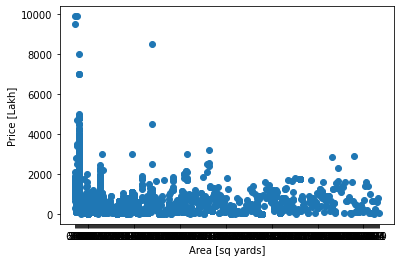

In [41]:
plt.scatter(x = da["area_value"], y = da["price_in_lakh"])
plt.xlabel ("Area [sq yards]")
plt.ylabel ("Price [Lakh]")

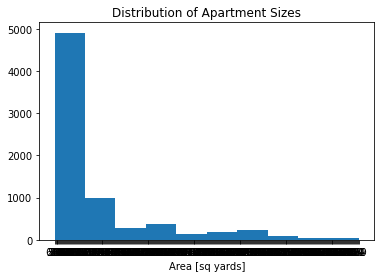

In [42]:
plt.hist(da["area_value"])
plt.xlabel("Area [sq yards]")
plt.title("Distribution of Apartment Sizes");

This histogram distribution is highly skewed to the right, revealing that the majority of apartments are small, with a few larger ones being represented.


In [48]:
#To apply one hot encoding so that we can apply a model on our data
da = pd.get_dummies(da, columns=['neighborhood'])

In [50]:
da = pd.get_dummies(da, columns=['type'])

In [51]:
#Check that the data type is suitable to enter the model
da.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7273 entries, 0 to 8413
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   price_in_lakh                     7273 non-null   float64
 1   bedrooms                          7273 non-null   float64
 2   bathrooms                         7273 non-null   float64
 3   area_value                        7273 non-null   object 
 4   neighborhood_Bahria Town Karachi  7273 non-null   bool   
 5   neighborhood_Clifton              7273 non-null   bool   
 6   neighborhood_DHA Defence          7273 non-null   bool   
 7   type_Flat                         7273 non-null   bool   
 8   type_House                        7273 non-null   bool   
dtypes: bool(5), float64(3), object(1)
memory usage: 319.6+ KB


In [52]:
#Change the data type of area_value into float
da['area_value'] = da['area_value'].astype(float)

In [53]:
da.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7273 entries, 0 to 8413
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   price_in_lakh                     7273 non-null   float64
 1   bedrooms                          7273 non-null   float64
 2   bathrooms                         7273 non-null   float64
 3   area_value                        7273 non-null   float64
 4   neighborhood_Bahria Town Karachi  7273 non-null   bool   
 5   neighborhood_Clifton              7273 non-null   bool   
 6   neighborhood_DHA Defence          7273 non-null   bool   
 7   type_Flat                         7273 non-null   bool   
 8   type_House                        7273 non-null   bool   
dtypes: bool(5), float64(4)
memory usage: 319.6 KB


# Split

In [60]:
target = da["price_in_lakh"]
features = da.drop(columns ="price_in_lakh")

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.3, random_state=0)
#to split data into train and test 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_train,y_train)*100)
print(model.score(X_test,y_test)*100)

59.93926907202676
56.12426949838213
